<a href="https://colab.research.google.com/github/Nyubk/ML_401/blob/main/rincon_ramirez_victorfrancisco_implementaci%C3%B3n_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

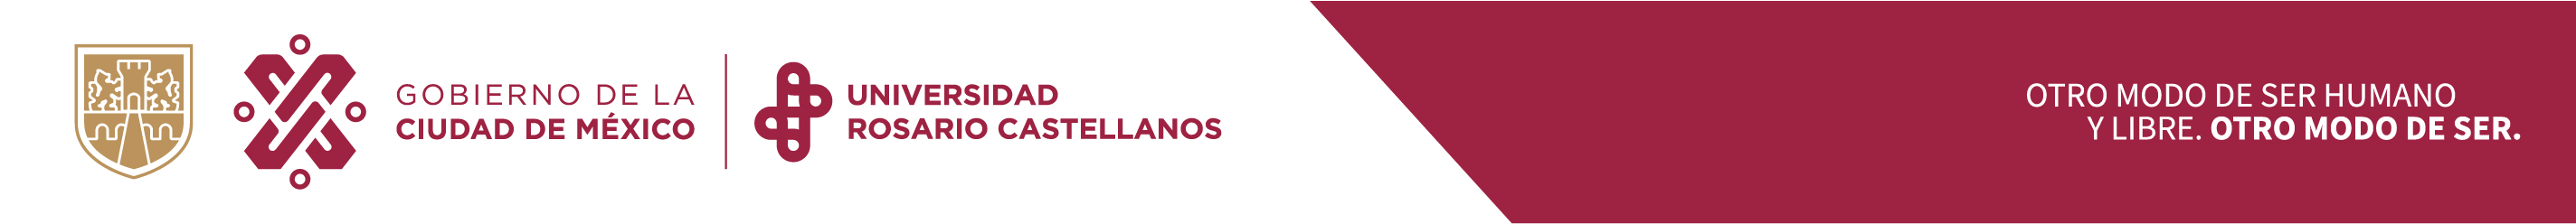

**Actualizado**: Diciembre, 2023

**Autor**: Victor Rincon(@Nyubk)

#Regresión Logística

##Introducción

<p align=justify>
En el siguiente proyecto trataremos de identificar la relación de personas que se suicidan cada año respecto al volumen de su población en cada estado de los Estados Unidos Mexicanos en el periodo de un año considerando los datos de 2020 y 2021.

Vamos analizar los casos donde los suicidios corresponden a menos del 1% de su población, con lo cual se pretende inferir que si las poblaciones numerosas parecieran tener mayor influencia en el indice de suicidios o es meramente una cuestión de proporcionalidad.


Primero vamos a importar lo modulos necesarios

In [76]:
#Para el análisis de los datos
import numpy as np
#Para la generación de gráficos
import matplotlib.pyplot as plt
#Para el manipulación de los datos
import pandas as pd

Y calculamos los límites utilizando sympy



In [74]:

import sympy as sp
# Definimos la variable
x = sp.symbols('x')
# Definimos la función
f = 1 / (1 + sp.exp(-x))
# Calculamos el limite
limite = sp.limit(f, x, sp.oo)
print(f"Límite de la función {f}:", limite)

Límite de la función 1/(1 + exp(-x)): 1


In [75]:
import sympy as sp
# Definimos la variable
x = sp.symbols('x')
# Definimos la función
f = 1 / (1 + sp.exp(-x))
# Calculamos el limite
limite = sp.limit(f, x, -sp.oo)
print(f"Límite de la función {f}:", limite)

Límite de la función 1/(1 + exp(-x)): 0


Definimos los arreglos de las variables

In [77]:
#Relacion de poblacion y suicidios por estado en 2020
relacionPS=[181,97,67,70,273,50,203,535,450,115,501,47,132,655,832,375,106,91,351,214,336,200,176,258,115,304,115,164,52,289,243,126]
#1 tasa mayor a 1% de probabilidad de muerte por suicidio
#0 tasa menor a 1% de probabilidad de muerte por suicidio
s=[1,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1]

In [78]:
#Inicializamos los parámetros del modelo
learning_rate = 0.01
num_epochs = 10000
w = 0.10
b = 0.10

In [79]:
# Entrenamiento del modelo
for epoch in range(num_epochs):
    dw = 0
    db = 0
    for i in range(len(relacionPS)):
        # Calculamos la predicción
        z = w * relacionPS[i] + b
        predicciones = 1 / (1 + 2.71828**(-z))

        # Calculamos el error
        error = predicciones - s[i]

        # Actualizamos los gradientes
        dw += relacionPS[i] * error # Esto es equivalente a dw = dw + horas_de_estudio[i] * error
        db += error # Esto es equivalente a db = db + error

    dw /= len(relacionPS) # Esto es equivalente a dw = dw / len(horas_de_estudio)
    db /= len(relacionPS) # Esto es equivalente a db = db / len(horas_de_estudio)

    # Actualizamos los parámetros
    w -= learning_rate * dw # Esto es equivalente a w = w - learning_rate * dw
    b -= learning_rate * db # Esto es equivalente a b = b - learning_rate * db
    # print(f"Los nuevos valores son w: {w} y b: {b}")

Definimos la función predictiva


In [80]:
def predecir(scd):
    z = w * scd + b
    probabilidad_scd = 1 / (1 + 2.71828**(-z))
    if probabilidad_scd >= 0.5:
        return "Probable"
    else:
        return "No probable"

Testeamos el modelo

In [83]:
relacionPS_nuevas=[174,121,58,110,293,77,245,572,352,139,449,45,185,728,936,330,158,92,400,189,359,232,167,282,171,328,110,202,61,253,340,130]
for mrt in relacionPS_nuevas:
    resultado = predecir(mrt)
    print(f"Con {mrt} de muertes por suicidio, ese estado es {resultado} que el 1% de las muertes en el año sea por suicidio")

Con 174 de muertes por suicidio, ese estado es Probable que el 1% de las muertes en el año sea por suicidio
Con 121 de muertes por suicidio, ese estado es Probable que el 1% de las muertes en el año sea por suicidio
Con 58 de muertes por suicidio, ese estado es Probable que el 1% de las muertes en el año sea por suicidio
Con 110 de muertes por suicidio, ese estado es Probable que el 1% de las muertes en el año sea por suicidio
Con 293 de muertes por suicidio, ese estado es Probable que el 1% de las muertes en el año sea por suicidio
Con 77 de muertes por suicidio, ese estado es Probable que el 1% de las muertes en el año sea por suicidio
Con 245 de muertes por suicidio, ese estado es Probable que el 1% de las muertes en el año sea por suicidio
Con 572 de muertes por suicidio, ese estado es Probable que el 1% de las muertes en el año sea por suicidio
Con 352 de muertes por suicidio, ese estado es Probable que el 1% de las muertes en el año sea por suicidio
Con 139 de muertes por suicidi

En esta gráfica podemos observar que el porcentaje de una relación entre la población y sus muertes no esta relacionada directamente con un población mayor, sino con el rango que existe entre el 10% y el 15%.

Tambien con la prueba del modelo anterior podemos observar que realmente no influye la correlación directamente entre una población grande y su cantidad de suicidios, todos tienen una alta probabilidad (<1%)

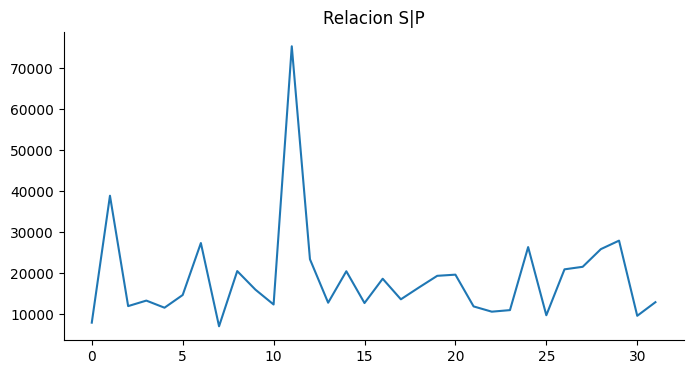

In [85]:
ds=pd.read_csv("Libro1.csv")
from matplotlib import pyplot as plt
ds['Relacion S|P'].plot(kind='line', figsize=(8, 4), title='Relacion S|P')
plt.gca().spines[['top', 'right']].set_visible(False)

Usaremos la métrica accuracy_score para proporcionar una medida de precisión en el modelo

In [ ]:
from sklearn.metrics import accuracy_score

# Datos de prueba
relacionPS_nuevas=[155,95,67,92]
etiquetas_reales = ["Probable", "No Probable", "Probable", "No Probable"]

predicciones = [predecir(mrt) for mrt in relacionPS_nuevas]

# Calcula la precisión
precision = accuracy_score(etiquetas_reales, predicciones)

print("Labels:", etiquetas_reales)
print("Predicciones de modelo:", predicciones)
print("Precisión del modelo:", precision)

Labels: ['Probable', 'No Probable', 'Probable', 'No Probable']
Predicciones de modelo: ['Probable', 'Probable', 'Probable', 'Probable']
Precisión del modelo: 0.5


<p align=justify>
Con la prueba de precisión podemos observar que su precisión es bastante baja pues se queda justo a la mitad, por lo que la prueba con el modelo no es tan fiable como podríamos esperar si utilizamos datos etiquetados.

In [ ]:
# Importa las bibliotecas necesarias
from sklearn.metrics import confusion_matrix

# Datos de prueba
relacionPS_nuevas=[155,95,67,92]
etiquetas_reales = ["Probable", "No Probable", "Probable", "No Probable"]

predicciones = [predecir(mrt) for mrt in relacionPS_nuevas]

# Calcula la precisión
precision = accuracy_score(etiquetas_reales, predicciones)

# Calcula la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_reales, predicciones)

print("Matriz de confusión:")
print(matriz_confusion)

Matriz de confusión:
[[0 2]
 [0 2]]


La matriz de confusión utilizada nos ayudo a evaluar el rendimiento, donde podemos observar con base a la siguiente tabla:



|                | Predicción Positiva | Predicción Negativa |
|----------------|---------------------|---------------------|
| Etiqueta Positiva | Verdadero Positivo | Falso Negativo  |
| Etiqueta Negativa | Falso Positivo     | Verdadero Negativo |

Si nuestros resultados son los siguientes:

|                | Predicción Positiva | Predicción Negativa |
|----------------|---------------------|---------------------|
| Etiqueta Positiva | 0 | 2  |
| Etiqueta Negativa | 0    | 2 |

Observamos que ningun rsultado correcto es verdadero, y que ningun resultado falso tampoco acerto, sino unicamente acerto a los que no  ha clasificado correctamente como negativas, cuando en realidad eran negativas.

Por lo que se infiere los datos probablemente no fueron catalogados correctamente para el entrenamiento.

##Conclusión

En conclusión, aunque el modelado de ML no fue correcto la observación simple de los datos ingresados y de la gráfica generada podemos observar que si existe una relación entre la relación del volumen de la población con respecto a los casos de suicidios, pero es ta solo se da cuando esa relación se encuentra entre el 10% y 15%